<a href="https://colab.research.google.com/github/Ron-Wu/Machine-learning-0602/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from tensorflow.keras.datasets.mnist import load_data # mnist 手寫資料
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()

In [22]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


5


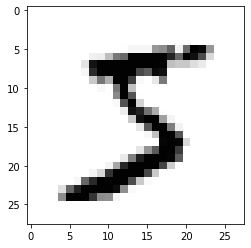

In [23]:
import matplotlib.pyplot as plt
print(y_train[0])

# matplot colormap: https://matplotlib.org/stable/tutorials/colors/colormaps.html
plt.imshow(x_train[0], cmap="Greys") # cmap 可以改變圖片顏色

In [24]:
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

layers = [
      # 784 * 128(線條) + 128(bias) = 100480
      Dense(128, activation = "relu", input_dim = 784),
      # 128 * 10(線條) + 10(bias) = 1290
      Dense(10, activation = "softmax")
]
model  = Sequential(layers)
model.summary() # summary印出摘要

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Param 1290 = 128 * 10 + 10(bias)
bias是threshold(門檻值)來的偏移量

In [26]:
# mse 坡度在預測差的時候太小，cross entropy 坡度好多了
# 二元(sigmoid)：Binary Cross Entropy p log (1/q) + (1-p) log (1/1-q)
# 多元(softmax)：Categorical Cross Entropy pi log(1/qi)
# from tensorflow.keras.losses import CategoricalCrossentropy
# from tensorflow.keras.optimizers import Adam
# model.compile(loss = CategoricalCrossentropy(),
#               optimizers = Adam(),
#               metrics = ["accuracy"])

from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=CategoricalCrossentropy(),
              optimizer=Adam(),
              metrics=["accuracy"])

In [27]:
# 資料預處理
# 答案：[0, 5, 2, 3, .....]
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print(y_train[0])
print(y_test_cat[0])

5
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [28]:
# 圖片：[[255, 0, 255, 128]]
# 28 * 28 -> 784
x_train_norm = x_train.reshape(60000, 784) / 255
x_test_norm = x_test.reshape(10000, 784) / 255
print(x_train_norm[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [31]:
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# # validation_split: 切出一些驗證資料來做驗證(0.1: 54000筆資料訓練)
# # epochs: 看幾輪(10輪: 54000 * 10)
# # batch_size: 看了多少筆再做一次梯度調整(看圖片大小, 圖片小:200, 圖片大:20)
# # 200batch, 10epoch: 54000 * 10 / 200 -> 2700(梯度調整)
# # verbose: 0(無聲) 1(最詳細) 2(沒有進度條)
# callbacks = [
#     EarlyStopping(patience=5, restore_best_weights=True),
#     ModelCheckpoint("mlp.h5", save_best_only=True)
# ]
# model.fit(x_train_norm,
#           y_train_cat,
#           validation_split=0.1,
#           epochs=100,
#           batch_size=200,
#           verbose=2,
#           callbacks=callbacks)

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# validation_split: 切出一些驗證資料來做驗證(0.1: 54000筆資料訓練)
# epoches: 看幾輪(10輪:54000 * 10)
# batch_size: 看了多少比在做一次梯度調整（看圖片大小，圖片小：~200, 圖片大: ~20）
# 200batch, qpepoch: 54000 * 10 / 200 -> 2700（梯度調整）
# verbose: 0(無聲)、1(最詳細)、2(沒有進度條)
callbacks = [
    EarlyStopping(patience = 5, restore_best_weights = True),
    ModelCheckpoint("MLP.h5", save_best_only = True)
]
model.fit(x_train_norm,
          y_train_cat,
          validation_split = 0.1,
          epochs = 100,
          batch_size = 200,
          verbose = 2,
          callbacks = callbacks)

Epoch 1/10
270/270 - 2s - loss: 0.4376 - accuracy: 0.8811 - val_loss: 0.1978 - val_accuracy: 0.9460
Epoch 2/10
270/270 - 1s - loss: 0.2050 - accuracy: 0.9418 - val_loss: 0.1435 - val_accuracy: 0.9593
Epoch 3/10
270/270 - 1s - loss: 0.1489 - accuracy: 0.9578 - val_loss: 0.1158 - val_accuracy: 0.9683
Epoch 4/10
270/270 - 1s - loss: 0.1162 - accuracy: 0.9674 - val_loss: 0.0982 - val_accuracy: 0.9733
Epoch 5/10
270/270 - 1s - loss: 0.0944 - accuracy: 0.9734 - val_loss: 0.0879 - val_accuracy: 0.9740
Epoch 6/10
270/270 - 1s - loss: 0.0789 - accuracy: 0.9772 - val_loss: 0.0865 - val_accuracy: 0.9743
Epoch 7/10
270/270 - 1s - loss: 0.0663 - accuracy: 0.9810 - val_loss: 0.0830 - val_accuracy: 0.9745
Epoch 8/10
270/270 - 1s - loss: 0.0566 - accuracy: 0.9839 - val_loss: 0.0791 - val_accuracy: 0.9757
Epoch 9/10
270/270 - 1s - loss: 0.0498 - accuracy: 0.9866 - val_loss: 0.0787 - val_accuracy: 0.9757
Epoch 10/10
270/270 - 1s - loss: 0.0425 - accuracy: 0.9881 - val_loss: 0.0761 - val_accuracy: 0.9783

In [32]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0795 - accuracy: 0.9764


[0.0795089453458786, 0.9764000177383423]

In [33]:
from sklearn.metrics import confusion_matrix
# predict_proba -> predict
# predict -> predict_classes
# 只要在tensorflow: 就代 one-hot y_test_cat
# 不在: 就代原本 y_test
pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
             columns = ["{}(預測)".format(i) for i in range(10)],
             index = ["{}(正確)".format(i) for i in range(10)]
             )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(正確),972,0,0,2,0,0,1,2,2,1
1(正確),0,1123,4,0,0,1,2,1,4,0
2(正確),4,4,1002,3,1,0,2,9,7,0
3(正確),0,0,4,993,0,0,0,5,5,3
4(正確),1,0,5,0,962,0,2,4,2,6
5(正確),4,2,0,16,1,851,5,2,9,2
6(正確),6,3,0,1,4,2,937,1,4,0
7(正確),1,5,9,3,0,0,0,1007,0,3
8(正確),5,1,1,7,5,1,2,6,945,1
9(正確),4,4,0,9,8,1,0,10,1,972
